In [1]:
# 2. Exploratory Data Analysis: The student performance dataset provides a detailed overview of
# student performance in various schools, focusing on academic achievements and demographic factors.
# (a) For each gender, which major has the highest total study hours per week? (2 marks)
# (b) Which gender has the highest overall average attendance rate? Return the gender and the average
# attendance rate? (3 marks)
# (c) What percentage of students have part-time jobs, and what percentage have no part-time jobs?
# (5 marks)
# (d) For each gender, what is the mean GPA and variance of age? (5 marks)
# (e) Create a visualization that effectively shows if there is a relationship between any two variables
# of your choice. Your answer must be given in a single pipe. (5 marks)

In [ ]:
#My resource of work was google, W3 schools, classwork notebooks and lessons and the notes files for data science.

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('student_performance_data.csv')
data

,StudentID,Gender,Age,StudyHoursPerWeek,AttendanceRate,GPA,Major,PartTimeJob,ExtraCurricularActivities
0,1,Male,24,37,90.75,3.47,Arts,Yes,No
1,2,Female,22,37,74.90,2.32,Education,No,No
2,3,Male,22,10,53.36,2.38,Business,No,No
3,4,Male,24,10,70.26,3.46,Science,Yes,No
4,5,Male,18,19,74.87,2.31,Education,Yes,No
...,...,...,...,...,...,...,...,...,...
495,496,Male,22,37,76.61,2.97,Science,No,No
496,497,Male,23,11,56.29,3.20,Science,No,No
497,498,Female,20,6,56.64,3.20,Science,No,Yes
498,499,Male,22,18,57.18,2.05,Business,No,Yes


a)

In [4]:
import pandas as pd

result_a = data.groupby(['Gender', 'Major'])['StudyHoursPerWeek'].sum().reset_index()

# Finding the major with the highest total study hours for each gender
highest_study_hours_per_gender = result_a.loc[result_a.groupby('Gender')['StudyHoursPerWeek'].idxmax()]

print(highest_study_hours_per_gender)


   Gender      Major  StudyHoursPerWeek
1  Female   Business               1229
7    Male  Education               1212


b)

In [5]:
result_b = data.groupby('Gender')['AttendanceRate'].mean()

# Finding the Gender with the highest average attendance rate
highest_avg_attendance = result_b.idxmax()
highest_avg_value = result_b.max()

print(f"Gender with the highest average attendance rate: {highest_avg_attendance}")
print(f"Average attendance rate: {highest_avg_value}")


Gender with the highest average attendance rate: Female
Average attendance rate: 75.9257421875


c)

In [6]:
# Counting the occurrences of PartTimeJob and no PartTimeJob
part_time_count = data['PartTimeJob'].value_counts(normalize=True) * 100

# Printing the percentage of students with and without PartTimeJobs
print(part_time_count)


PartTimeJob
Yes    53.6
No     46.4
Name: proportion, dtype: float64


d)

In [7]:
result_d = data.groupby('Gender').agg(
    mean_gpa=('GPA', 'mean'),
    age_variance=('Age', 'var')
)

print(result_d)


        mean_gpa  age_variance
Gender                        
Female  2.995352      4.005637
Male    2.974467      3.960130


e)

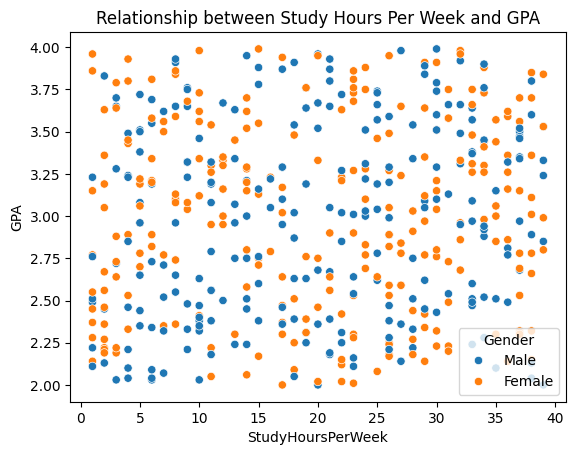

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot between StudyHoursPerWeek and GPA
sns.scatterplot(data=data, x='StudyHoursPerWeek', y='GPA', hue='Gender')
plt.title('Relationship between Study Hours Per Week and GPA')
plt.show()
